In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crime_regression_data.csv', index_col=['boro', 'zipcode'])
df.head()

businesses  cafe  pawn  debt   cig  total_select_bus     hpdA  \
boro  zipcode                                                                  
Bronx 10453           447   NaN   NaN   NaN   NaN               NaN  12079.0   
      10457           470   NaN   NaN   NaN   NaN               NaN  11139.0   
      10460           313   NaN   NaN   NaN   NaN               NaN   7043.0   
      10458           535   6.0  15.0   1.0  95.0             117.0  11936.0   
      10467           604   NaN   NaN   NaN   NaN               NaN  10581.0   

                  hpdB     hpdC  hpdTotal     ...      positiveRodent  \
boro  zipcode                                 ...                       
Bronx 10453    36822.0  11188.0   60089.0     ...             23460.0   
      10457    33267.0  10221.0   54627.0     ...             30270.0   
      10460    20282.0   6783.0   34108.0     ...             15991.0   
      10458    34378.0  11569.0   57883.0     ...             28913.0   
      10467    30801.0   9495.0   50877.0     ...             12557.0   

                 total  violation  misdemeanor   felony  population  \
boro  zipcode                                                         
Bronx 10453    58579.0     7514.0      37011.0  14054.0     76775.0   
      10457    67137.0     7683.0      42228.0  17226.0     69048.0   
      10460    51550.0     5677.0      31992.0  13881.0     53707.0   
      10458    69136.0     7326.0      41794.0  20016.0     77840.0   
      10467    64178.0     8656.0      37089.0  18433.0     94342.0   

               pop_per_sq_mile   theft  assault  harassment  
boro  zipcode                                                
Bronx 10453           87970.27  5745.0   8058.0      7409.0  
      10457           58547.95  6928.0   9025.0      7631.0  
      10460           33064.79  5491.0   6581.0      5527.0  
      10458           62296.26  9093.0   8358.0      7217.0  
      10467           33219.75  7209.0   7743.0      8542.0  

[5 rows x 21 columns]

In [3]:
# Scale the dataset and compute the correlation matrix

selected_col = ['cafe', 'pawn', 'debt', 'cig', 'total_select_bus', 'total', 'violation', 'misdemeanor', 'felony']
df1 = df.drop(selected_col, axis=1).dropna()
df1_scaled = preprocessing.scale(df1)
df1_new = pd.DataFrame(data=df1_scaled, columns = df1.columns)
cor_matrix = df1_new.corr()
cor_matrix

,businesses,hpdA,hpdB,hpdC,hpdTotal,negativeRodent,positiveRodent,population,pop_per_sq_mile,theft,assault,harassment
businesses,1.000000,0.249637,0.243660,0.222829,0.241238,0.257798,0.251259,0.717633,0.149517,0.540950,0.406004,0.497740
hpdA,0.249637,1.000000,0.993999,0.985928,0.995872,0.792244,0.735341,0.535953,0.485912,0.381457,0.796271,0.706864
hpdB,0.243660,0.993999,1.000000,0.991535,0.999407,0.785346,0.713937,0.536511,0.442416,0.360400,0.823400,0.726163
hpdC,0.222829,0.985928,0.991535,1.000000,0.994399,0.774557,0.711637,0.519823,0.450715,0.350000,0.820583,0.721067
hpdTotal,0.241238,0.995872,0.999407,0.994399,1.000000,0.786372,0.719403,0.534288,0.453802,0.363356,0.819307,0.722954
negativeRodent,0.257798,0.792244,0.785346,0.774557,0.786372,1.000000,0.854937,0.439419,0.348332,0.405502,0.725117,0.673309
positiveRodent,0.251259,0.735341,0.713937,0.711637,0.719403,0.854937,1.000000,0.400619,0.537741,0.502548,0.658678,0.595467
population,0.717633,0.535953,0.536511,0.519823,0.534288,0.439419,0.400619,1.000000,0.378728,0.488881,0.599266,0.650538
pop_per_sq_mile,0.149517,0.485912,0.442416,0.450715,0.453802,0.348332,0.537741,0.378728,1.000000,0.373091,0.292843,0.239671
theft,0.540950,0.381457,0.360400,0.350000,0.363356,0.405502,0.502548,0.488881,0.373091,1.000000,0.556068,0.635279


In [4]:
cols = ['hpdA', 'hpdB', 'hpdC', 'negativeRodent', 'population', 'pop_per_sq_mile', 'theft', 'assault', 'harassment']
df_scatterplot = df1.drop(cols, axis=1)
df_scatterplot.head()

businesses  hpdTotal  positiveRodent
boro  zipcode                                      
Bronx 10453           447   60089.0         23460.0
      10457           470   54627.0         30270.0
      10460           313   34108.0         15991.0
      10458           535   57883.0         28913.0
      10467           604   50877.0         12557.0

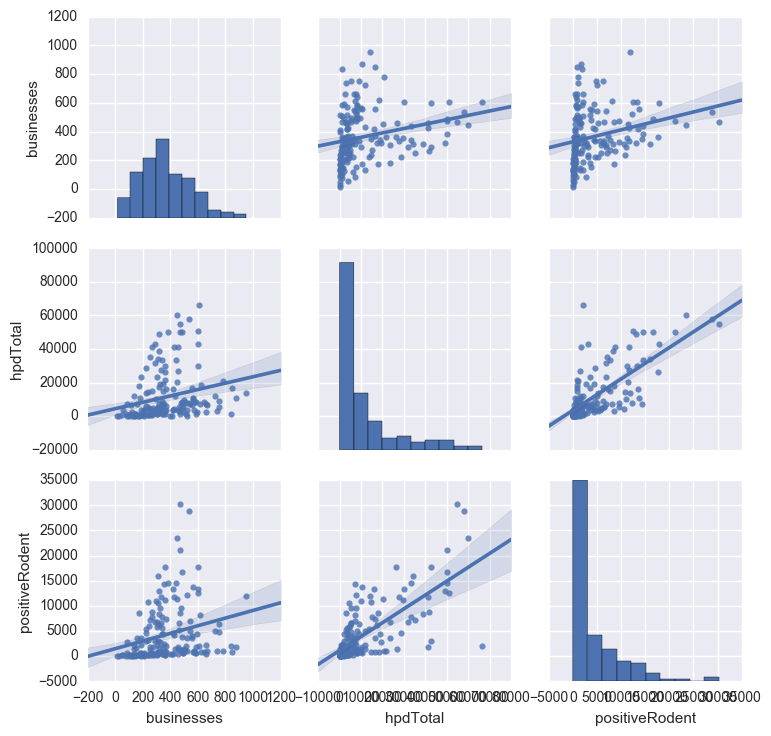

In [5]:
sns.set()
sns.pairplot(df_scatterplot, kind='reg', diag_kind='hist')
plt.show()

In [6]:
# Get summary statistics

basic_summary = df.dropna().describe()
basic_summary = basic_summary.applymap('{:.2f}'.format)
basic_summary

,businesses,cafe,pawn,debt,cig,total_select_bus,hpdA,hpdB,hpdC,hpdTotal,...,positiveRodent,total,violation,misdemeanor,felony,population,pop_per_sq_mile,theft,assault,harassment
count,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,...,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00
mean,397.24,14.94,2.26,0.72,57.09,75.01,2590.07,7147.49,2340.11,12077.67,...,5214.48,30647.06,3594.25,17340.12,9712.69,51696.45,52446.84,5582.61,2953.74,3522.89
std,161.11,19.98,4.27,1.10,21.27,31.06,2555.85,7508.94,2693.91,12726.52,...,5092.58,16014.38,1942.88,9579.91,4874.73,23941.04,27722.80,3342.62,1909.99,1899.98
min,88.00,1.00,0.00,0.00,22.00,23.00,2.00,5.00,2.00,9.00,...,209.00,5816.00,668.00,3302.00,1833.00,1225.00,2162.99,957.00,368.00,654.00
25%,293.75,2.00,0.00,0.00,39.00,55.75,767.00,2240.50,605.25,3530.00,...,1059.75,19209.50,2218.50,10928.00,6193.25,34758.25,32610.84,3148.00,1640.00,2185.75
50%,355.50,6.50,1.00,0.00,56.50,70.50,1734.00,4245.50,1264.00,7354.00,...,3942.50,27438.50,3141.50,14895.50,8815.50,49386.50,48364.64,5038.00,2368.50,3089.00
75%,494.25,18.00,3.00,1.00,70.00,91.00,3695.25,9980.75,2989.75,16515.00,...,7745.75,38478.75,4584.00,21966.75,12442.50,70480.00,71019.92,6768.75,3773.50,4391.75
max,847.00,94.00,32.00,5.00,113.00,165.00,11936.00,34378.00,11569.00,57883.00,...,28913.00,70207.00,9191.00,43453.00,22110.00,102078.00,126067.69,18995.00,8381.00,8984.00


## By Population

In [7]:
selected_cols = ['businesses', 'hpdTotal', 'positiveRodent', 'negativeRodent',\
                'population', 'violation', 'misdemeanor', 'felony', 'total', 'theft',\
                'assault', 'harassment', 'pop_per_sq_mile']
df3 = df[selected_cols].dropna()
cols = ['businesses', 'hpdTotal', 'positiveRodent', 'negativeRodent', 'felony', 'misdemeanor', 'violation', 
       'total']

for col in cols: 
    df3[col] = df3[col] / df3['population']
df3.head()

businesses  hpdTotal  positiveRodent  negativeRodent  \
boro  zipcode                                                         
Bronx 10453      0.005822  0.782664        0.305568        0.096099   
      10457      0.006807  0.791145        0.438391        0.175139   
      10460      0.005828  0.635076        0.297745        0.098069   
      10458      0.006873  0.743615        0.371441        0.134391   
      10467      0.006402  0.539283        0.133101        0.068729   

               population  violation  misdemeanor    felony     total   theft  \
boro  zipcode                                                                   
Bronx 10453       76775.0   0.097870     0.482071  0.183054  0.762996  5745.0   
      10457       69048.0   0.111270     0.611575  0.249479  0.972324  6928.0   
      10460       53707.0   0.105703     0.595677  0.258458  0.959838  5491.0   
      10458       77840.0   0.094116     0.536922  0.257143  0.888181  9093.0   
      10467       94342.0   0.091751     0.393133  0.195385  0.680270  7209.0   

               assault  harassment  pop_per_sq_mile  
boro  zipcode                                        
Bronx 10453     8058.0      7409.0         87970.27  
      10457     9025.0      7631.0         58547.95  
      10460     6581.0      5527.0         33064.79  
      10458     8358.0      7217.0         62296.26  
      10467     7743.0      8542.0         33219.75

In [8]:
# Normalize data
Y = ['total']
df3_new = pd.DataFrame(np.c_[preprocessing.scale(df3.drop(Y, 1)), df3[Y]], index=df3.index, columns = df3.columns)
df3_new.head()

businesses  hpdTotal  positiveRodent  negativeRodent  \
boro  zipcode                                                         
Bronx 10453     -0.382933  2.647876        1.931112        2.082262   
      10457     -0.274087  2.686942        3.132514        4.711441   
      10460     -0.382301  1.968089        1.860351        2.147797   
      10458     -0.266768  2.468020        2.526946        3.356005   
      10467     -0.318815  1.526870        0.371114        1.171819   

               population  violation  misdemeanor    felony     total  \
boro  zipcode                                                           
Bronx 10453      1.144432   0.229534     0.253360 -0.153248  0.369129   
      10457      0.837707   0.451681     0.619583  0.148805  0.741841   
      10460      0.228740   0.359386     0.574625  0.189637  0.289105   
      10458      1.186708   0.167295     0.408473  0.183656  1.423940   
      10467      1.841761   0.128090     0.001854 -0.097177  0.830372   

                  theft   assault  harassment  pop_per_sq_mile  
boro  zipcode                                                   
Bronx 10453    2.011236  1.694863    1.827576         0.762996  
      10457    2.399995  1.792188    0.717757         0.972324  
      10460    1.417443  0.869796   -0.243476         0.959838  
      10458    2.131844  1.610690    0.859144         0.888181  
      10467    1.884597  2.191569   -0.237631         0.680270

In [9]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [10]:
model = ols("total ~ businesses + hpdTotal + positiveRodent + negativeRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     8.119
Date:                Fri, 05 May 2017   Prob (F-statistic):           5.47e-06
Time:                        19:11:38   Log-Likelihood:                -220.29
No. Observations:                 166   AIC:                             450.6
Df Residuals:                     161   BIC:                             466.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7.633e-17      0.072   1.06e

In [11]:
model = ols("total ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     10.84
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.58e-06
Time:                        19:11:38   Log-Likelihood:                -220.36
No. Observations:                 166   AIC:                             448.7
Df Residuals:                     162   BIC:                             461.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       7.633e-17      0.072   1.06e

In [12]:
model = ols("felony ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 felony   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     264.1
Date:                Fri, 05 May 2017   Prob (F-statistic):           3.85e-62
Time:                        19:11:38   Log-Likelihood:                -88.354
No. Observations:                 166   AIC:                             184.7
Df Residuals:                     162   BIC:                             197.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.388e-17      0.032   4.29e

In [13]:
model = ols("misdemeanor ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            misdemeanor   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     231.1
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.68e-58
Time:                        19:11:38   Log-Likelihood:                -97.431
No. Observations:                 166   AIC:                             202.9
Df Residuals:                     162   BIC:                             215.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -9.714e-17      0.034  -2.84e

In [14]:
model = ols("violation ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              violation   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     86.04
Date:                Fri, 05 May 2017   Prob (F-statistic):           2.41e-33
Time:                        19:11:38   Log-Likelihood:                -156.45
No. Observations:                 166   AIC:                             320.9
Df Residuals:                     162   BIC:                             333.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -8.327e-17      0.049  -1.71e

In [15]:
model = ols("theft ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  theft   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     51.81
Date:                Fri, 05 May 2017   Prob (F-statistic):           1.56e-23
Time:                        19:11:39   Log-Likelihood:                -179.71
No. Observations:                 166   AIC:                             367.4
Df Residuals:                     162   BIC:                             379.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -6.245e-17      0.056  -1.11e

In [16]:
model = ols("assault ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                assault   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     31.06
Date:                Fri, 05 May 2017   Prob (F-statistic):           6.45e-16
Time:                        19:11:39   Log-Likelihood:                -197.83
No. Observations:                 166   AIC:                             403.7
Df Residuals:                     162   BIC:                             416.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept      -4.857e-17      0.063  -7.76e

In [17]:
model = ols("harassment ~ businesses + hpdTotal + positiveRodent", df3_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             harassment   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     26.98
Date:                Fri, 05 May 2017   Prob (F-statistic):           3.33e-14
Time:                        19:11:39   Log-Likelihood:                -201.92
No. Observations:                 166   AIC:                             411.8
Df Residuals:                     162   BIC:                             424.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       1.492e-16      0.064   2.33e